# Extreme Fill 2D Example

In [4]:
from extremefill2D.fextreme import init_sim, restart_sim
from extremefill2D.fextreme.plot import vega_plot
import vega
from extremefill2D.fextreme.tools import get_by_uuid

In [15]:
treant = init_sim('scripts/params.json', 'data', tags=['debug'])

In [16]:
treant = restart_sim(treant, 10)

In [12]:
# NBVAL_IGNORE_OUTPUT
treant.uuid

'8de55c11-3de8-4891-a36e-6cc7462ae0ae'

In [5]:
# from extremefill2D.fextreme.tools import get_by_uuid
# treant = get_by_uuid('8de55c11')

In [6]:
out = vega_plot(treant)

In [7]:
type(out) is vega.Vega

True

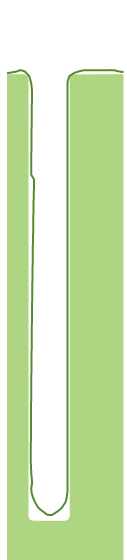

In [8]:
# NBVAL_IGNORE_OUTPUT
out